In [99]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
df_house = pd.read_csv("df_beijinghouse_geo.csv")
df_house.head()

,longitude,latitude,heat_con,layout,location,neighborhood,type_layout,area,building,decoration,direction,heat,name,price,subway,url,visiting,zone,zoneinfo
0,116.346931,39.884589,集中供暖,整租,广安门,西城,房屋户型：1室1厅1卫 整租,40平米,车站西街17号院,NaN,南,NaN,车站西街17号院1居室,5530,NaN,https://bj.lianjia.com/zufang/BJ0004868491.html,NaN,广安门租房/高楼层(共18层)/1993年建塔楼,1室1厅
1,116.396765,39.857360,集中供暖,整租,洋桥,丰台,房屋户型：1室1厅1卫 整租,45平米,海户西里,原味,南,集中供暖,海户西里1居室,5960,近地铁,https://bj.lianjia.com/zufang/BJ0004872617.html,随时看房,洋桥租房/低楼层(共18层)/1993年建塔楼,1室1厅
2,116.346931,39.884589,集中供暖,整租,广安门,西城,房屋户型：1室1厅1卫 整租,46平米,车站西街17号院,NaN,南,NaN,车站西街17号院1居室,5430,NaN,https://bj.lianjia.com/zufang/BJ0004872565.html,NaN,广安门租房/高楼层(共6层)/1992年建板楼,1室1厅
3,116.931683,38.714061,集中供暖,整租,马甸,西城,房屋户型：1室1厅1卫 整租,60平米,阳光丽景,原味,北,集中供暖,阳光丽景1居室,8930,近地铁,https://bj.lianjia.com/zufang/BJ0004879242.html,随时看房,马甸租房/低楼层(共16层)/2003年建板塔结合,1室1厅
4,116.338077,40.082796,自供暖,合租,回龙观,昌平,房屋户型：3室1厅1卫 合租,15平米,龙腾苑三区,自如友家4.0拿铁,南,自供暖,龙腾苑三区3居室 01卧,3690,近地铁,https://bj.lianjia.com/zufang/BJ0004846189.html,随时看房,回龙观租房/低楼层(共6层)/2002年建板楼,3室1厅


In [101]:
df_house["type_layout"].isnull().value_counts()

False    2987
True       13
Name: type_layout, dtype: int64

In [102]:
df_house["layout_info"] = df_house["type_layout"].str.extract(r"^房屋户型：(\w.*)\s+.*租")

In [103]:
df_house.head()

,longitude,latitude,heat_con,layout,location,neighborhood,type_layout,area,building,decoration,direction,heat,name,price,subway,url,visiting,zone,zoneinfo,layout_info
0,116.346931,39.884589,集中供暖,整租,广安门,西城,房屋户型：1室1厅1卫 整租,40平米,车站西街17号院,NaN,南,NaN,车站西街17号院1居室,5530,NaN,https://bj.lianjia.com/zufang/BJ0004868491.html,NaN,广安门租房/高楼层(共18层)/1993年建塔楼,1室1厅,1室1厅1卫
1,116.396765,39.857360,集中供暖,整租,洋桥,丰台,房屋户型：1室1厅1卫 整租,45平米,海户西里,原味,南,集中供暖,海户西里1居室,5960,近地铁,https://bj.lianjia.com/zufang/BJ0004872617.html,随时看房,洋桥租房/低楼层(共18层)/1993年建塔楼,1室1厅,1室1厅1卫
2,116.346931,39.884589,集中供暖,整租,广安门,西城,房屋户型：1室1厅1卫 整租,46平米,车站西街17号院,NaN,南,NaN,车站西街17号院1居室,5430,NaN,https://bj.lianjia.com/zufang/BJ0004872565.html,NaN,广安门租房/高楼层(共6层)/1992年建板楼,1室1厅,1室1厅1卫
3,116.931683,38.714061,集中供暖,整租,马甸,西城,房屋户型：1室1厅1卫 整租,60平米,阳光丽景,原味,北,集中供暖,阳光丽景1居室,8930,近地铁,https://bj.lianjia.com/zufang/BJ0004879242.html,随时看房,马甸租房/低楼层(共16层)/2003年建板塔结合,1室1厅,1室1厅1卫
4,116.338077,40.082796,自供暖,合租,回龙观,昌平,房屋户型：3室1厅1卫 合租,15平米,龙腾苑三区,自如友家4.0拿铁,南,自供暖,龙腾苑三区3居室 01卧,3690,近地铁,https://bj.lianjia.com/zufang/BJ0004846189.html,随时看房,回龙观租房/低楼层(共6层)/2002年建板楼,3室1厅,3室1厅1卫


In [104]:
df_house['area'] = df_house['area'].str.extract(r"^(\d.*)平米")

In [105]:
df_house_sub = df_house[['neighborhood','location','building','layout', 
                         'layout_info', 'area', 'price', 'heat_con',
                         'direction','decoration' ,'longitude', 'latitude']]

In [106]:
df_house_sub.to_csv("beijing_house_info.csv",index=False)

In [107]:
df_house_sub.head()

,neighborhood,location,building,layout,layout_info,area,price,heat_con,direction,decoration,longitude,latitude
0,西城,广安门,车站西街17号院,整租,1室1厅1卫,40,5530,集中供暖,南,NaN,116.346931,39.884589
1,丰台,洋桥,海户西里,整租,1室1厅1卫,45,5960,集中供暖,南,原味,116.396765,39.857360
2,西城,广安门,车站西街17号院,整租,1室1厅1卫,46,5430,集中供暖,南,NaN,116.346931,39.884589
3,西城,马甸,阳光丽景,整租,1室1厅1卫,60,8930,集中供暖,北,原味,116.931683,38.714061
4,昌平,回龙观,龙腾苑三区,合租,3室1厅1卫,15,3690,自供暖,南,自如友家4.0拿铁,116.338077,40.082796


In [108]:
df_house_sub.dtypes

neighborhood     object
location         object
building         object
layout           object
layout_info      object
area             object
price             int64
heat_con         object
direction        object
decoration       object
longitude       float64
latitude        float64
dtype: object

In [109]:
df_house_sub['area'].astype(int)

0        40
1        45
2        46
3        60
4        15
5        12
6         7
7        56
8        15
9        10
10       56
11       12
12       42
13       57
14       65
15       14
16       54
17       18
18       60
19        8
20       48
21       21
22        8
23       45
24       14
25       63
26       15
27       11
28       13
29       61
       ... 
2970    194
2971     77
2972     71
2973     60
2974    120
2975     85
2976     57
2977     89
2978    148
2979     88
2980    285
2981     67
2982     88
2983    157
2984    120
2985    291
2986     64
2987    104
2988     61
2989    134
2990    134
2991     52
2992     85
2993    199
2994     43
2995     88
2996     49
2997     38
2998     89
2999     58
Name: area, Length: 3000, dtype: int64

In [110]:
df_house_sub['decoration'].value_counts()

精装修          118
原味            56
自如友家4.0拿铁     25
自如友家4.0米苏     22
自如友家4.0布丁     14
自如友家4.0木棉     11
自如整租2.0原味      3
自如友家3.0木棉      2
业主直租原味         2
自如友家4.0原味      2
自如友家2.0拿铁      1
自如友家3.0米苏      1
自如友家3.0布丁      1
Name: decoration, dtype: int64

In [111]:
df_house_sub.groupby('decoration').price.value_counts()

decoration  price
业主直租原味      7400     2
原味          6660     3
            7990     3
            5690     2
            6390     2
            8090     2
            8360     2
            22000    2
            4160     1
            4190     1
            4390     1
            4490     1
            4790     1
            4990     1
            5560     1
            5660     1
            5730     1
            5790     1
            5890     1
            5960     1
            6060     1
            6090     1
            6130     1
            6330     1
            6490     1
            6590     1
            6760     1
            6960     1
            7060     1
            7090     1
                    ..
自如友家4.0木棉   2260     3
            2990     2
            3030     1
            3390     1
            3490     1
            3890     1
            4660     1
            5730     1
自如友家4.0米苏   2390     2
            2790     2
            4630     2
            1430

In [112]:
df_house_sub['decoration'] = df_house_sub['decoration'].replace('.*原味', '业主直租',regex=True)

/Users/siruizhu/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [113]:
df_house_sub['decoration'].value_counts()

精装修          118
业主直租          63
自如友家4.0拿铁     25
自如友家4.0米苏     22
自如友家4.0布丁     14
自如友家4.0木棉     11
自如友家3.0木棉      2
自如友家2.0拿铁      1
自如友家3.0米苏      1
自如友家3.0布丁      1
Name: decoration, dtype: int64

In [114]:
df_house_sub['decoration'].isnull().value_counts()

True     2742
False     258
Name: decoration, dtype: int64

In [115]:
df_house_sub.dropna(subset=['decoration'],inplace=True)

/Users/siruizhu/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [116]:
df_house_sub['decoration'].isnull().value_counts()

False    258
Name: decoration, dtype: int64

In [117]:
df_house_sub['decoration'].value_counts()

精装修          118
业主直租          63
自如友家4.0拿铁     25
自如友家4.0米苏     22
自如友家4.0布丁     14
自如友家4.0木棉     11
自如友家3.0木棉      2
自如友家3.0布丁      1
自如友家2.0拿铁      1
自如友家3.0米苏      1
Name: decoration, dtype: int64

In [118]:
df_house_sub['decoration'] = df_house_sub['decoration'].replace("精装修","Exquisite",regex=True)
df_house_sub['decoration'] =df_house_sub['decoration'].replace("业主直租", "Direct rent by owner",regex=True)
df_house_sub['decoration'] =df_house_sub['decoration'].replace("自如友家4.0拿铁", "Ziroom Decorate 4.0 Latte",regex=True)
df_house_sub['decoration'] =df_house_sub['decoration'].replace("自如友家4.0米苏", "Ziroom Decorate 4.0 Misu",regex=True)
df_house_sub['decoration'] =df_house_sub['decoration'].replace("自如友家4.0布丁", "Ziroom Decorate 4.0 Pudding",regex=True)
df_house_sub['decoration'] =df_house_sub['decoration'].replace("自如友家4.0木棉", "Ziroom Decorate 4.0 Mumian",regex=True)
df_house_sub['decoration'] =df_house_sub['decoration'].replace("自如友家3.0木棉", "Ziroom Decorate 3.0 Mumian",regex=True)
df_house_sub['decoration'] =df_house_sub['decoration'].replace("自如友家3.0布丁", "Ziroom Decorate 3.0 Pudding",regex=True)
df_house_sub['decoration'] =df_house_sub['decoration'].replace("自如友家3.0米苏", "Ziroom Decorate 3.0 Misu",regex=True)
df_house_sub['decoration'] =df_house_sub['decoration'].replace("自如友家2.0拿铁", "Ziroom Decorate 3.0 Mumian",regex=True)

/Users/siruizhu/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/siruizhu/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/siruizhu/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [119]:
df_house_sub['price'] = df_house_sub['price'] / 1000

/Users/siruizhu/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [120]:
df_house_sub[df_house_sub['decoration'] == 'Exquisite'].sort_values(by='price',ascending=False)

,neighborhood,location,building,layout,layout_info,area,price,heat_con,direction,decoration,longitude,latitude
1166,朝阳,建国门外,嘉华世纪公寓,整租,3室1厅3卫,214,85.0,集中供暖,东 南 西 北,Exquisite,116.447147,39.911584
1006,朝阳,建国门外,嘉华世纪公寓,整租,3室1厅3卫,214,85.0,集中供暖,东 南 西 北,Exquisite,116.447147,39.911584
1939,朝阳,亚运村,华悦国际公寓,整租,8室2厅3卫,176,44.0,集中供暖,南 北,Exquisite,116.419831,40.013101
867,西城,金融街,金宸国际公寓,整租,3室2厅2卫,205,43.0,集中供暖,南 北,Exquisite,116.368592,39.918905
1759,西城,金融街,金宸国际公寓,整租,3室1厅2卫,205,40.0,集中供暖,南 北,Exquisite,116.368592,39.918905
990,朝阳,朝青,天鹅湾南区,整租,3室2厅4卫,247,40.0,集中供暖,东 南 北,Exquisite,116.529668,39.926712
1163,东城,工体,聚龙花园,整租,2室1厅2卫,195,35.0,集中供暖,东南,Exquisite,116.448577,39.935428
886,朝阳,石佛营,公园1872,整租,4室2厅2卫,242,32.0,集中供暖,南 西 北,Exquisite,NaN,NaN
1280,西城,马甸,华尊大厦,整租,3室2厅1卫,226,30.0,集中供暖,东南,Exquisite,116.389262,39.977657
2507,东城,金宝街,禾风仕家,整租,3室2厅2卫,173,30.0,自供暖,西北,Exquisite,116.403854,39.941606


In [121]:
df_house_sub_1 = df_house_sub[df_house_sub['layout'] == '整租']
df_house_sub_1.head()

,neighborhood,location,building,layout,layout_info,area,price,heat_con,direction,decoration,longitude,latitude
1,丰台,洋桥,海户西里,整租,1室1厅1卫,45,5.96,集中供暖,南,Direct rent by owner,116.396765,39.857360
3,西城,马甸,阳光丽景,整租,1室1厅1卫,60,8.93,集中供暖,北,Direct rent by owner,116.931683,38.714061
13,丰台,角门,司达小区,整租,2室1厅1卫,57,6.06,集中供暖,南,Direct rent by owner,116.386758,39.851091
14,西城,金融街,北京尊府,整租,1室1厅1卫,65,13.50,集中供暖,西,Direct rent by owner,116.368105,39.908498
16,丰台,刘家窑,南三环中路,整租,2室1厅1卫,54,5.73,集中供暖,南,Direct rent by owner,116.405050,39.862854


In [122]:
df_house_sub_2 = df_house_sub[df_house_sub['layout'] == '合租']
df_house_sub_2.head()

,neighborhood,location,building,layout,layout_info,area,price,heat_con,direction,decoration,longitude,latitude
4,昌平,回龙观,龙腾苑三区,合租,3室1厅1卫,15,3.69,自供暖,南,Ziroom Decorate 4.0 Latte,116.338077,40.082796
8,昌平,回龙观,龙腾苑三区,合租,3室1厅1卫,15,3.16,自供暖,南,Ziroom Decorate 4.0 Latte,116.338077,40.082796
22,门头沟,石门营,惠润家园小区二地块,合租,3室1厅1卫,8,1.43,集中供暖,东,Ziroom Decorate 4.0 Misu,117.132998,39.190066
24,丰台,太平桥,太平桥西里,合租,3室1厅1卫,14,3.29,集中供暖,东,Ziroom Decorate 4.0 Latte,116.321647,39.887815
28,丰台,洋桥,海户西里33号院,合租,3室1厅1卫,13,3.29,集中供暖,西南,Ziroom Decorate 4.0 Latte,116.396070,39.857039


In [123]:
df_house_sub['layout'].value_counts()

整租      174
合租       78
暂无数据      2
Name: layout, dtype: int64

In [124]:
df_house_sub[df_house_sub['layout'] == '暂无数据']

,neighborhood,location,building,layout,layout_info,area,price,heat_con,direction,decoration,longitude,latitude
264,通州,临河里,华业东方玫瑰,暂无数据,NaN,90,5.2,集中供暖,南,Exquisite,116.689460,39.885684
1540,顺义,顺义城,金汉绿港五区,暂无数据,NaN,82,4.8,集中供暖,西北,Exquisite,116.666748,40.144939


In [125]:
#df_house_sub.dropna(subset=['layout'], inplace=True)

In [216]:
sns.set(rc={
    'figure.figsize':(20,10),
     'axes.edgecolor': '.8',
     'axes.facecolor': '#F8F7F3',
     'figure.facecolor': '#F8F7F3',
     'axes.grid': True,
     'axes.labelcolor': '.15',
     'axes.spines.bottom': True,
     'axes.spines.left': True,
     'axes.spines.right': True,
     'axes.spines.top': True,
     #'axes.prop_cycle': cycler('color', ['#aa96da', '#e79e85', '#eaceb4', '#7288B9', '#F0C595', '#76A08A', '#FDDDA4']),
     'axes.prop_cycle': cycler('color', ['#c04851', '#f1939c', '#ef82a0', '#a8456b', '#66a9c9', '#22a2c3', '#134857']),
    
})

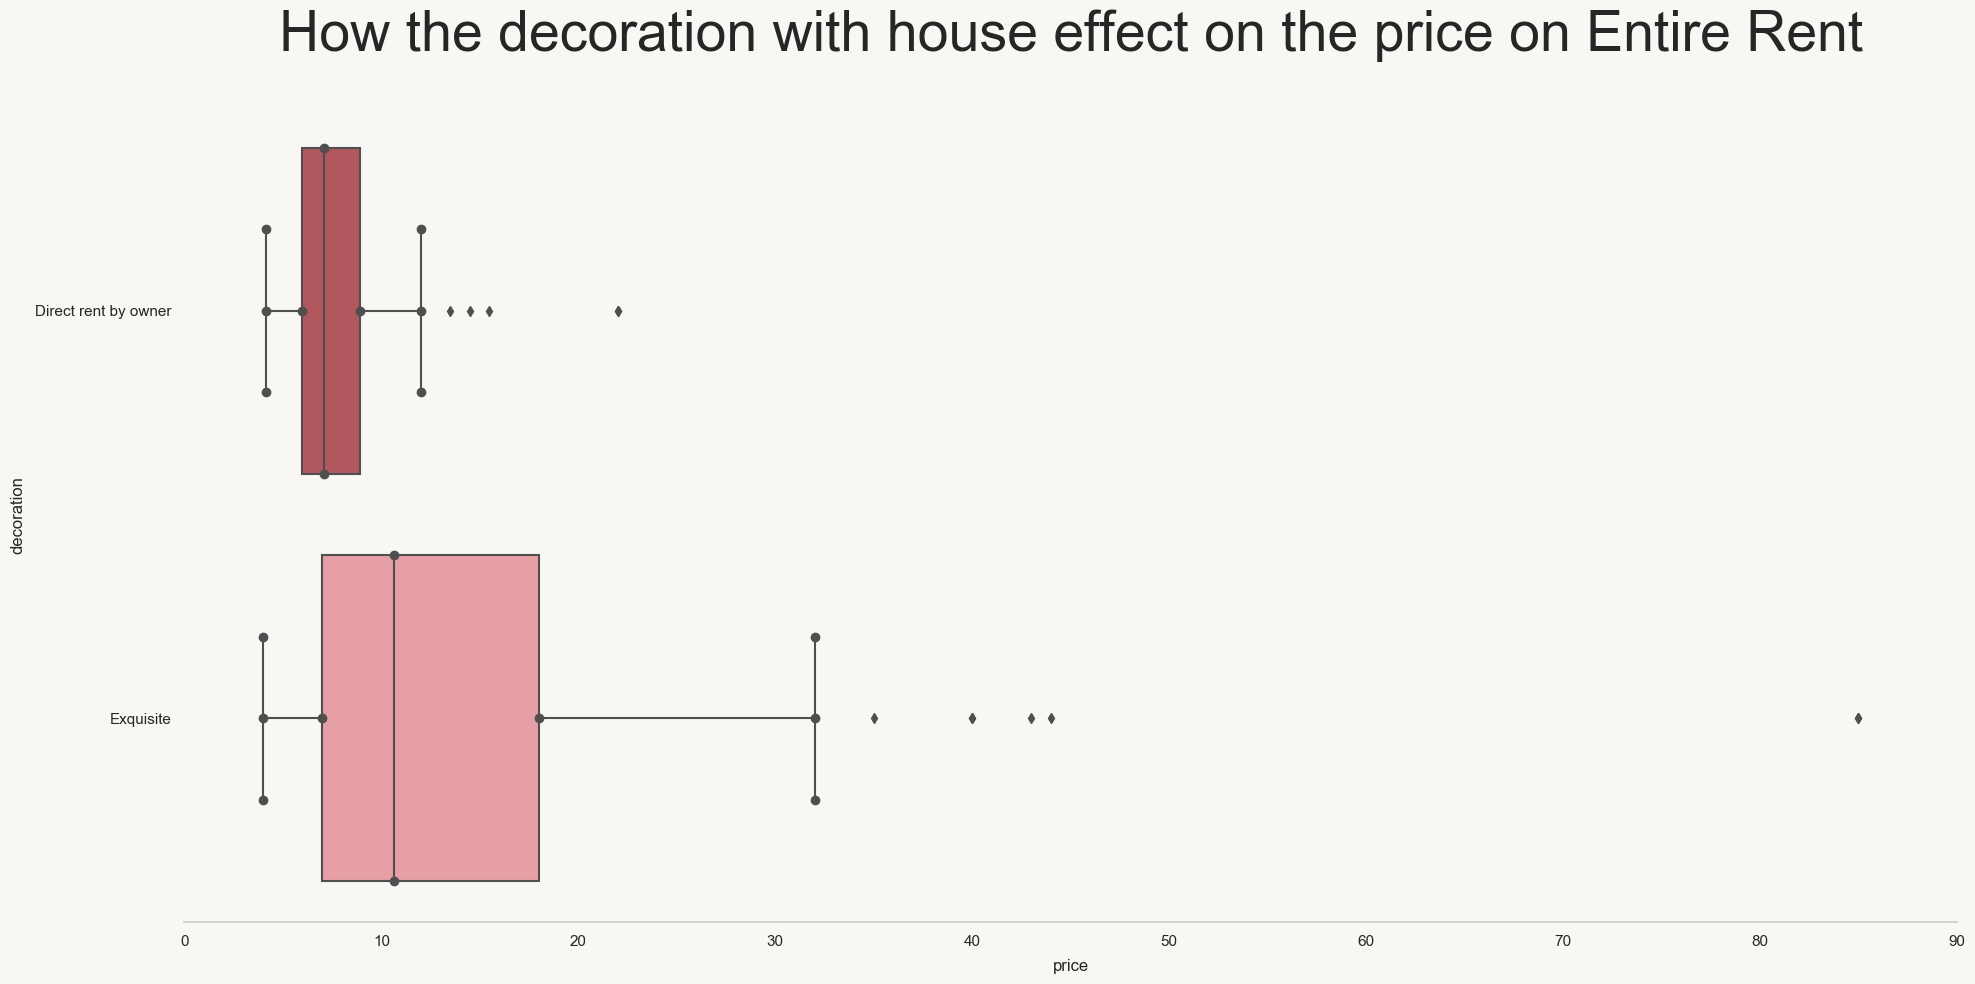

In [217]:
ax = sns.boxplot(y='decoration', x='price', data=df_house_sub_1, orient='h')
sns.set(font='Arial Unicode MS')
plt.xlim(0, 90)
sns.set(rc={'figure.figsize':(20,10)})
sns.despine(left=True)
ax.set_title("How the decoration with house effect on the price on Entire Rent", pad=40);
ax.title.set_fontsize(40)
ax.title.set_fontname('Arial Unicode MS')

plt.tight_layout()
plt.savefig('output1.pdf')

In [128]:
df_house_sub_2['decoration'].value_counts()

Ziroom Decorate 4.0 Latte      25
Ziroom Decorate 4.0 Misu       21
Ziroom Decorate 4.0 Pudding    14
Ziroom Decorate 4.0 Mumian     11
Ziroom Decorate 3.0 Mumian      3
Direct rent by owner            2
Ziroom Decorate 3.0 Misu        1
Ziroom Decorate 3.0 Pudding     1
Name: decoration, dtype: int64

In [129]:
df_house_sub_2[(df_house_sub_2['decoration'] == 'Ziroom Decorate 3.0 Pudding') | 
               (df_house_sub_2['decoration'] == 'Ziroom Decorate 3.0 Misu') |
               (df_house_sub_2['decoration'] == 'Direct rent by owner') |
               (df_house_sub_2['decoration'] == 'Ziroom Decorate 3.0 Mumian')
                           
              ]

,neighborhood,location,building,layout,layout_info,area,price,heat_con,direction,decoration,longitude,latitude
33,朝阳,朝阳门外,东大桥路,合租,3室1厅1卫,7,3.49,集中供暖,西,Ziroom Decorate 3.0 Misu,116.456770,39.922361
525,朝阳,团结湖,团结湖路,合租,3室1厅1卫,11,3.23,集中供暖,南,Ziroom Decorate 3.0 Mumian,116.473623,39.932767
569,昌平,天通苑,天通西苑三区,合租,4室1厅1卫,28,3.06,集中供暖,西,Ziroom Decorate 3.0 Pudding,116.416620,40.082678
671,朝阳,朝阳门外,东大桥路,合租,2室1厅1卫,14,3.93,集中供暖,东南,Ziroom Decorate 3.0 Mumian,116.456770,39.922361
1911,海淀,双榆树,双榆树北路,合租,2室1厅1卫,15,5.06,集中供暖,南,Direct rent by owner,116.329657,39.978495
1959,东城,东直门,后永康胡同2号院4号院,合租,2室1厅1卫,15,3.19,集中供暖,南,Ziroom Decorate 3.0 Mumian,116.430301,39.950666
2482,朝阳,农展馆,农展南里,合租,3室1厅1卫,15,3.96,集中供暖,南,Direct rent by owner,116.472863,39.940866


In [131]:
df_house_sub_2.drop(index=33, inplace=True)

/Users/siruizhu/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [132]:
df_house_sub_2.drop(index=569, inplace=True)

/Users/siruizhu/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [133]:
df_house_sub_2.drop(index=525, inplace=True)

/Users/siruizhu/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [134]:
df_house_sub_2.drop(index=671, inplace=True)
df_house_sub_2.drop(index=1911, inplace=True)
df_house_sub_2.drop(index=1959, inplace=True)
df_house_sub_2.drop(index=2482, inplace=True)

/Users/siruizhu/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [135]:
df_house_sub_2['decoration'].value_counts()

Ziroom Decorate 4.0 Latte      25
Ziroom Decorate 4.0 Misu       21
Ziroom Decorate 4.0 Pudding    14
Ziroom Decorate 4.0 Mumian     11
Name: decoration, dtype: int64

In [210]:
sns.set(rc={
    'figure.figsize':(20,10),
     'axes.edgecolor': '.8',
     'axes.facecolor': '#F8F7F3',
     'figure.facecolor': '#F8F7F3',
     'axes.grid': True,
     'axes.labelcolor': '.15',
     'axes.spines.bottom': True,
     'axes.spines.left': True,
     'axes.spines.right': True,
     'axes.spines.top': True,
     #'axes.prop_cycle': cycler('color', ['#aa96da', '#e79e85', '#eaceb4', '#7288B9', '#F0C595', '#76A08A', '#FDDDA4']),
     'axes.prop_cycle': cycler('color', ['#c04851', '#f1939c', '#ef82a0', '#a8456b', '#66a9c9', '#22a2c3', '#134857'])
    
})

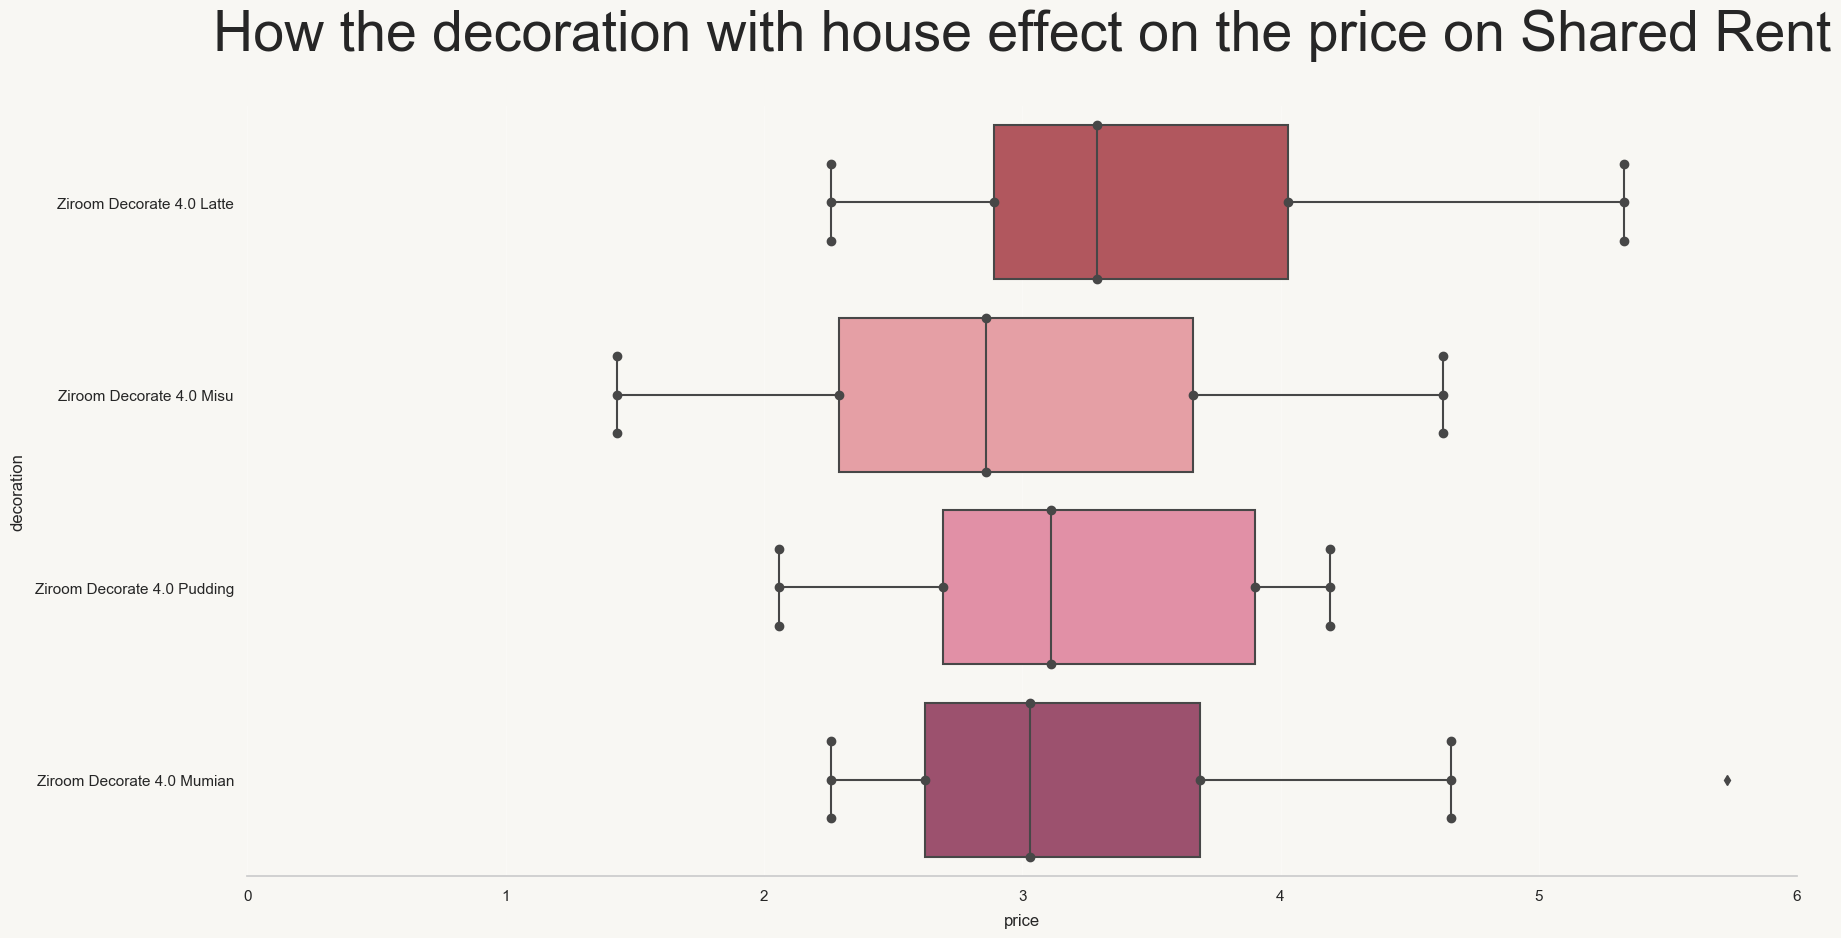

In [211]:
ax2 = sns.boxplot(y='decoration', x='price', data=df_house_sub_2, orient='h')
# sns.set(font='Arial Unicode MS')
plt.xlim(0, 6)
sns.despine(left=True)
ax2.set_title("How the decoration with house effect on the price on Shared Rent", pad=40);
ax2.title.set_fontsize(40)
ax2.title.set_fontname('Arial Unicode MS')

plt.savefig('output2.pdf')

In [139]:
df_house_sub_2['direction'].value_counts()

南     31
北     16
东     12
西     10
西南     2
Name: direction, dtype: int64

### Direction with price

In [167]:
df_direction_price = df_house_sub_2.groupby("direction").price.mean().sort_values(ascending=True).reset_index()
df_direction_price

,direction,price
0,西,2.898000
1,北,2.955000
2,南,3.394516
3,西南,3.440000
4,东,3.634167


In [189]:
df_direction_price['price'] = round(df_direction_price['price'],2)

In [190]:
df_direction_price['direction'] = df_direction_price['direction'].replace("西","West",regex=True)
df_direction_price['direction'] = df_direction_price['direction'].replace("北","North",regex=True)
df_direction_price['direction'] = df_direction_price['direction'].replace("南","South",regex=True)
df_direction_price['direction'] = df_direction_price['direction'].replace("西南","West South",regex=True)
df_direction_price['direction'] = df_direction_price['direction'].replace("东","East",regex=True)

In [191]:
#style
import matplotlib.pyplot as plt
from cycler import cycler
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#F8F7F3',
    'axes.facecolor': '#F8F7F3',
#     'figure.facecolor': '#474744',
#     'axes.facecolor': '#474744',
    'font.family': 'Sans serif',
    'font.weight': 'normal',
    'lines.linewidth': 2.5, 
    'lines.marker': 'o',
    'lines.markersize'  : 3,
    'lines.solid_capstyle': 'butt',
    'lines.markeredgewidth'  : 1.0, 
    'lines.solid_joinstyle' : 'miter',
    'axes.prop_cycle': cycler('color', ['#c04851', '#f1939c', '#ef82a0', '#a8456b', '#66a9c9', '#22a2c3', '#134857']),
    #'axes.prop_cycle': cycler('color', ['#1DACE8', '#EDCB64', '#B5966D', '#DAECED', '#CECD7B', '#76A08A', '#F7B0AA']),
    #'axes.prop_cycle': cycler('color', ['#ffd9e8', '#de95ba', '#7f4a88', '#4a266a', '#e45a84', '#ffacac', '#b80257']),
    #'axes.prop_cycle': cycler('color', ['#aa96da', '#e79e85', '#eaceb4', '#7288B9', '#F0C595', '#76A08A', '#FDDDA4']),
    #'axes.prop_cycle': cycler('color', ['#88304e']),
    #'axes.prop_cycle': cycler('color', ['#e23e57', '#88304e', '#522546', '#311d3f', '#0881a3', '#3e6b89', '#071a52']),
    'axes.spines.left'   : False,   
    'axes.spines.bottom' : False,
    'axes.spines.top'    : False,
    'axes.spines.right'  : False,
    'axes.linewidth': 0.2,
    'axes.labelsize': 'large',
    'axes.labelpad': 7.0, 
    'ytick.left': False,
    'xtick.bottom' : False,
    'axes.grid': True,
#     'text.color': 'white',
    'grid.color': 'white',
    'grid.alpha': 0.3,
    'grid.linewidth': 0.4,
    'grid.linestyle': '--',
    'legend.loc': 'best',
    'legend.fancybox': True,  
    'ytick.labelsize': 'medium',
    'savefig.facecolor' : '#F8F7F3'
#     'savefig.facecolor' : '#474744'
})

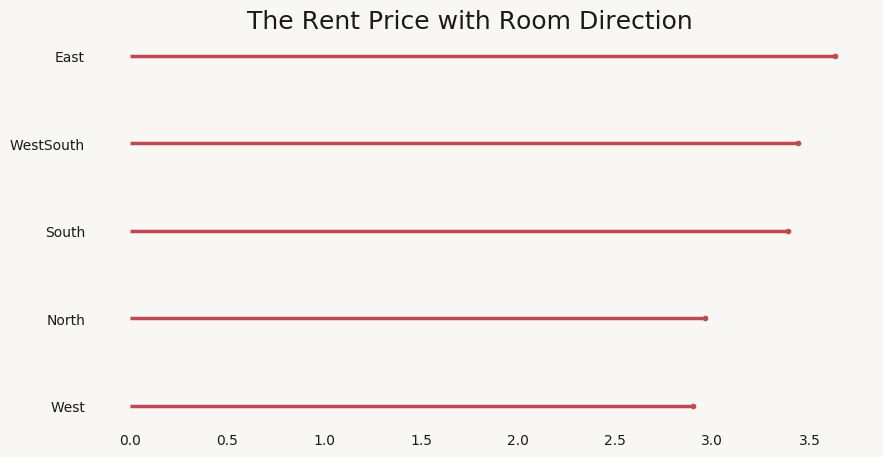

In [198]:
ordered_df = df_direction_price.sort_values(by='price')
my_range=range(1,len(df_direction_price.index)+1)
import seaborn as sns

fig = plt.figure(figsize=(10,5))
plt.hlines(y=my_range, xmin=0, xmax=df_direction_price['price'], color='#c04851')
plt.plot(df_direction_price['price'], my_range, "o")
plt.Figure(figsize=(20,10))
plt.grid(False)
plt.yticks(my_range, df_direction_price['direction'])

plt.gcf().text(0.5, 0.9, "The Rent Price with Room Direction", ha='center', fontsize=18)

# plt.tight_layout()
plt.savefig('output4.pdf')

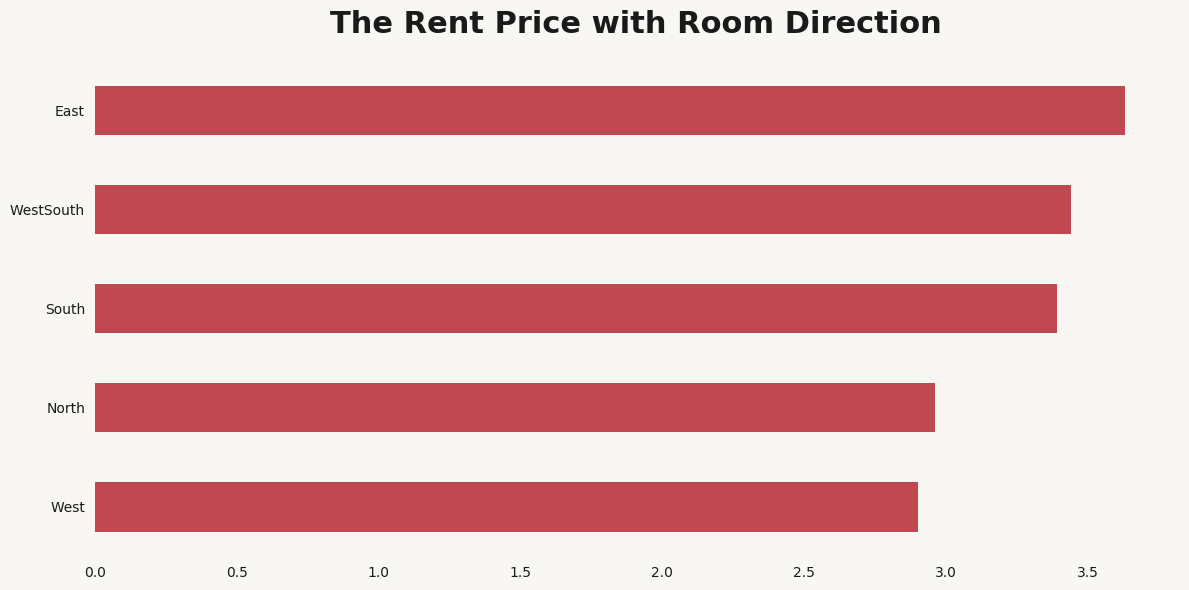

In [200]:
ax3 = df_direction_price.plot(x='direction', y='price', figsize=(12,6), kind='barh', color = '#c04851')
ax3.set_title("The Rent Price with Room Direction", fontsize=22, pad=20, loc ='center', weight='bold')
ax3.grid(False)
ax3.yaxis.label.set_visible(False)
ax3.xaxis.label.set_visible(False)
ax3.legend_.remove()

plt.tight_layout()
plt.savefig('output5.pdf')

In [201]:
df_house_sub.head()

,neighborhood,location,building,layout,layout_info,area,price,heat_con,direction,decoration,longitude,latitude
1,丰台,洋桥,海户西里,整租,1室1厅1卫,45,5.96,集中供暖,南,Direct rent by owner,116.396765,39.857360
3,西城,马甸,阳光丽景,整租,1室1厅1卫,60,8.93,集中供暖,北,Direct rent by owner,116.931683,38.714061
4,昌平,回龙观,龙腾苑三区,合租,3室1厅1卫,15,3.69,自供暖,南,Ziroom Decorate 4.0 Latte,116.338077,40.082796
8,昌平,回龙观,龙腾苑三区,合租,3室1厅1卫,15,3.16,自供暖,南,Ziroom Decorate 4.0 Latte,116.338077,40.082796
13,丰台,角门,司达小区,整租,2室1厅1卫,57,6.06,集中供暖,南,Direct rent by owner,116.386758,39.851091


In [202]:
df_house_sub['area']

1        45
3        60
4        15
8        15
13       57
14       65
16       54
18       60
20       48
22        8
23       45
24       14
28       13
30       68
33        7
36       16
43      128
47       14
48       59
53       76
55      179
56       65
58       11
61       63
67      147
71       80
77      102
104      66
110      69
166      57
       ... 
2435     10
2437     84
2452     69
2456    147
2463     56
2470     63
2478     50
2480     14
2481     26
2482     15
2483     50
2486    138
2505    196
2507    173
2584     59
2624    177
2629     95
2658    103
2731     93
2779    196
2802     97
2818     80
2867    143
2876     55
2881     83
2922     92
2946     55
2956     46
2961     72
2964     81
Name: area, Length: 258, dtype: object

In [203]:
df_house_sub.dtypes

neighborhood     object
location         object
building         object
layout           object
layout_info      object
area             object
price           float64
heat_con         object
direction        object
decoration       object
longitude       float64
latitude        float64
dtype: object

In [204]:
df_house_sub['area'] = df_house_sub['area'].astype(int)

/Users/siruizhu/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


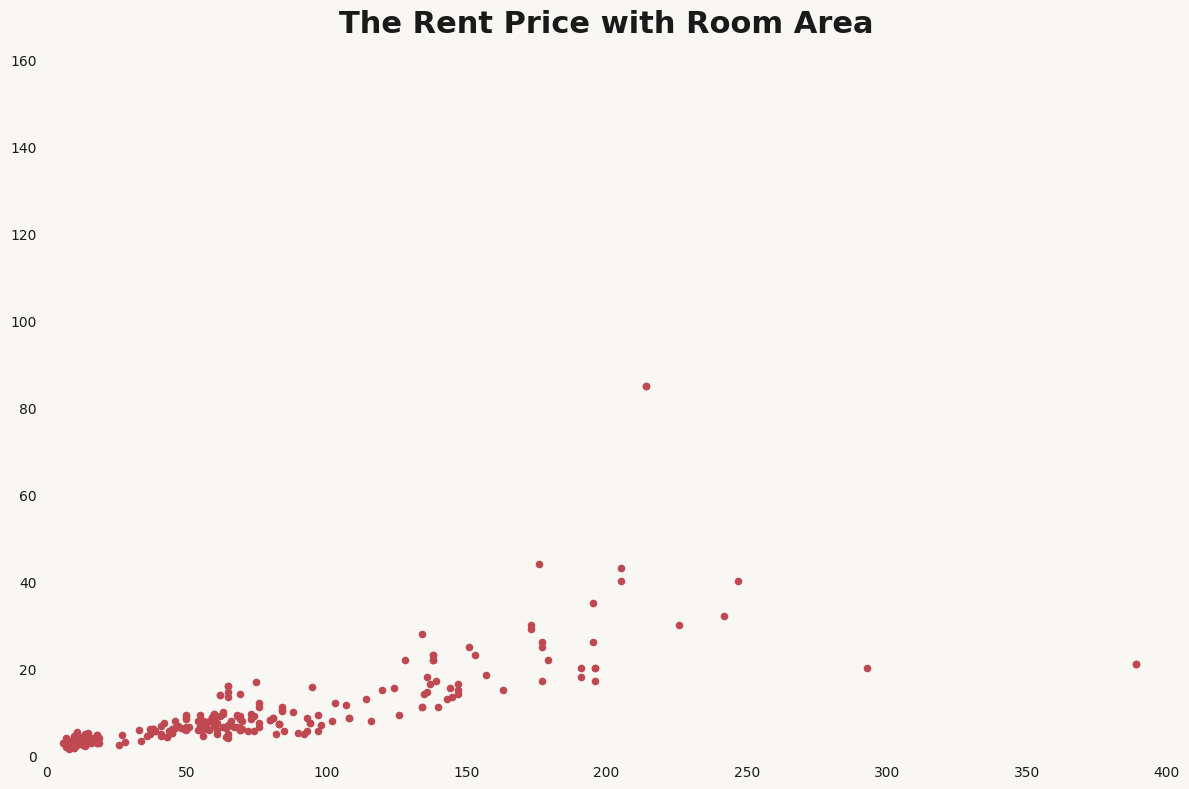

In [206]:
ax = df_house_sub.plot.scatter(x='area', y='price', figsize=(12,8),)
ax.set_title("The Rent Price with Room Area", fontsize=22, pad=20, loc ='center', weight='bold')
ax.grid(False)
ax.set_xlim(0,400)
ax.set_ylim(0,160)
ax.yaxis.label.set_visible(False)
ax.xaxis.label.set_visible(False)

plt.tight_layout()
plt.savefig('output3.pdf')

In [207]:
df_house_sub.head()

,neighborhood,location,building,layout,layout_info,area,price,heat_con,direction,decoration,longitude,latitude
1,丰台,洋桥,海户西里,整租,1室1厅1卫,45,5.96,集中供暖,南,Direct rent by owner,116.396765,39.857360
3,西城,马甸,阳光丽景,整租,1室1厅1卫,60,8.93,集中供暖,北,Direct rent by owner,116.931683,38.714061
4,昌平,回龙观,龙腾苑三区,合租,3室1厅1卫,15,3.69,自供暖,南,Ziroom Decorate 4.0 Latte,116.338077,40.082796
8,昌平,回龙观,龙腾苑三区,合租,3室1厅1卫,15,3.16,自供暖,南,Ziroom Decorate 4.0 Latte,116.338077,40.082796
13,丰台,角门,司达小区,整租,2室1厅1卫,57,6.06,集中供暖,南,Direct rent by owner,116.386758,39.851091


In [208]:
df_house_sub_1_nbh = df_house_sub_1.groupby('neighborhood').price.mean().reset_index(name = 'price_mean')
df_house_sub_1_nbh

,neighborhood,price_mean
0,东城,15.919375
1,丰台,7.838966
2,亦庄开发区,20.000000
3,大兴,4.285000
4,昌平,7.272500
5,朝阳,16.117538
6,海淀,9.116842
7,石景山,4.945000
8,西城,13.136071
9,通州,6.915000


In [209]:
df_house_sub_2_nbh = df_house_sub_2.groupby('neighborhood').price.mean().reset_index(name = 'price_mean')
df_house_sub_2_nbh

,neighborhood,price_mean
0,东城,3.580000
1,丰台,2.868750
2,大兴,2.260000
3,房山,1.710000
4,昌平,2.985333
5,朝阳,4.165385
6,海淀,4.095000
7,石景山,2.760000
8,西城,3.938000
9,通州,2.267500
